# Playground notebook
This notebook is used for demonstration and testing purposes.

In [1]:
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
import cv2

from config import DATA_DIR, FACES_DIR
from config import DEIDENTIFIED_DIR, REIDENTIFIED_DIR

### Find all images

In [2]:
import os
image_files = []
for root, dirs, files in os.walk(DATA_DIR):
    for file in files:
        if file.endswith(".jpg"):
             image_files.append(os.path.join(root, file))

### Load faces metadata (locations and dimensions)

In [3]:
with open(os.path.join(FACES_DIR, 'faces.pickle'), 'rb') as f:
    faces_dict = pickle.load(f)

### Show a random image and the face detection window
The cell below can be run multiple times with ctrl+enter

In [ ]:
img_path = image_files[np.random.randint(len(image_files))]
img_file = os.path.basename(img_path)
img = cv2.imread(img_path)

print(img_file)
print(faces_dict[img_file])
for x, y, w, h in faces_dict[img_file]:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
blurred_img_path = img_path.replace(DATA_DIR, DEIDENTIFIED_DIR)
blurred_img = cv2.imread(blurred_img_path)
blurred_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(img) 
plt.figure()
plt.imshow(blurred_img) 
plt.show()

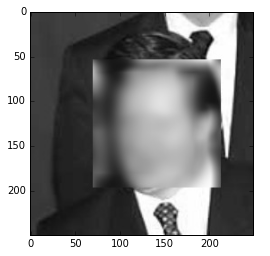

In [5]:
blurred_img_path = img_path.replace(DATA_DIR, DEIDENTIFIED_DIR)
img = cv2.imread(blurred_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img) 
plt.show()

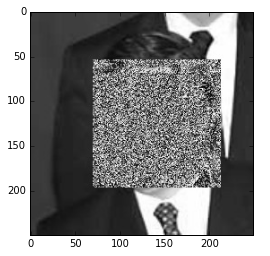

In [6]:
unblurred_img_path = img_path.replace(DATA_DIR, REIDENTIFIED_DIR)
img = cv2.imread(unblurred_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img) 
plt.show()